# <p style="font-size: 50px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center;">SALARY DATASET FOR PROGRAMMER</p>

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center;">Import thư viện cần thiết cho việc phân tích tập dữ liệu lương</p>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center">Load tập dữ liệu về lương</p>

In [132]:
df = pd.read_csv("C:\\Users\\PC (newgear)\\Desktop\\Data\\DA\\DA_PTDL\\Predict_Salary_Dataset\\salaries.csv")

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align: center">Quan sát và kiểm tra tập dữ liệu</p>

In [133]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
18052,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
18053,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
18054,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [134]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M


In [135]:
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
18051,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
18052,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
18053,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
18054,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
18055,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [136]:
df.shape

(18056, 11)

In [137]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,18056.000000,1.805600e+04,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471
std,0.715810,3.265629e+05,68728.941915,45.828340
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103500.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,188500.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [138]:
df.describe(include="object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,18056,18056,18056,18056,18056,18056,18056
unique,4,4,143,24,88,77,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,11486,17974,4284,16772,15899,15950,16767


In [139]:
df.describe(include="int64")

,work_year,salary,salary_in_usd,remote_ratio
count,18056.000000,1.805600e+04,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471
std,0.715810,3.265629e+05,68728.941915,45.828340
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103500.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,188500.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18056 non-null  int64 
 1   experience_level    18056 non-null  object
 2   employment_type     18056 non-null  object
 3   job_title           18056 non-null  object
 4   salary              18056 non-null  int64 
 5   salary_currency     18056 non-null  object
 6   salary_in_usd       18056 non-null  int64 
 7   employee_residence  18056 non-null  object
 8   remote_ratio        18056 non-null  int64 
 9   company_location    18056 non-null  object
 10  company_size        18056 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [141]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [142]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [143]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
18051,False,False,False,False,False,False,False,False,False,False,False
18052,False,False,False,False,False,False,False,False,False,False,False
18053,False,False,False,False,False,False,False,False,False,False,False
18054,False,False,False,False,False,False,False,False,False,False,False


In [144]:
#df = df[df.duplicated()]
#print("Giá trị trùng lặp ở các dòng", df.shape)

In [145]:
#df = df.drop_duplicates()

In [146]:
df.isna().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [147]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [148]:
for i in df.select_dtypes(include="int64").columns:
    print(df[i].value_counts())
    print("***"*10)

work_year
2023    8519
2024    7589
2022    1655
2021     218
2020      75
Name: count, dtype: int64
******************************
salary
150000     370
100000     366
130000     322
160000     308
140000     289
          ... 
19000        1
1335000      1
1450000      1
138350       1
423000       1
Name: count, Length: 2761, dtype: int64
******************************
salary_in_usd
150000    365
100000    344
130000    316
160000    306
140000    285
         ... 
56256       1
46809       1
38776       1
148261      1
173762      1
Name: count, Length: 3149, dtype: int64
******************************
remote_ratio
0      12355
100     5452
50       249
Name: count, dtype: int64
******************************


In [149]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

experience_level
SE    11486
MI     4584
EN     1463
EX      523
Name: count, dtype: int64
******************************
employment_type
FT    17974
PT       38
CT       30
FL       14
Name: count, dtype: int64
******************************
job_title
Data Scientist               4284
Data Engineer                3724
Data Analyst                 2604
Machine Learning Engineer    2030
Research Scientist            715
                             ... 
BI Data Engineer                1
Marketing Data Engineer         1
Data Science Tech Lead          1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 143, dtype: int64
******************************
salary_currency
USD    16772
GBP      644
EUR      459
CAD       59
INR       56
AUD       12
CHF        8
PLN        8
SGD        6
BRL        5
JPY        4
DKK        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
SEK        1
PHP        1
NZD        1
HKD        1
ZAR        1
M

In [150]:
for column in df.columns:
    distinct_values= len(df[column].unique())
    print(f"{column}: {distinct_values} giá trị")

work_year: 5 giá trị
experience_level: 4 giá trị
employment_type: 4 giá trị
job_title: 143 giá trị
salary: 2761 giá trị
salary_currency: 24 giá trị
salary_in_usd: 3149 giá trị
employee_residence: 88 giá trị
remote_ratio: 3 giá trị
company_location: 77 giá trị
company_size: 3 giá trị


In [151]:
df.work_year.value_counts()

work_year
2023    8519
2024    7589
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [152]:
df.experience_level.value_counts()

experience_level
SE    11486
MI     4584
EN     1463
EX      523
Name: count, dtype: int64

In [153]:
df.employment_type.value_counts()

employment_type
FT    17974
PT       38
CT       30
FL       14
Name: count, dtype: int64

In [154]:
df.job_title.value_counts()

job_title
Data Scientist               4284
Data Engineer                3724
Data Analyst                 2604
Machine Learning Engineer    2030
Research Scientist            715
                             ... 
BI Data Engineer                1
Marketing Data Engineer         1
Data Science Tech Lead          1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 143, dtype: int64

In [155]:
df.salary.value_counts()

salary
150000     370
100000     366
130000     322
160000     308
140000     289
          ... 
19000        1
1335000      1
1450000      1
138350       1
423000       1
Name: count, Length: 2761, dtype: int64

In [156]:
df.salary_currency.value_counts()

salary_currency
USD    16772
GBP      644
EUR      459
CAD       59
INR       56
AUD       12
CHF        8
PLN        8
SGD        6
BRL        5
JPY        4
DKK        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
SEK        1
PHP        1
NZD        1
HKD        1
ZAR        1
MXN        1
CLP        1
Name: count, dtype: int64

In [157]:
df.salary_in_usd.value_counts()

salary_in_usd
150000    365
100000    344
130000    316
160000    306
140000    285
         ... 
56256       1
46809       1
38776       1
148261      1
173762      1
Name: count, Length: 3149, dtype: int64

In [158]:
df.employee_residence.value_counts()

employee_residence
US    15899
GB      714
CA      494
ES      141
DE      104
      ...  
IQ        1
BG        1
JE        1
RS        1
LU        1
Name: count, Length: 88, dtype: int64

In [159]:
df.remote_ratio.value_counts()

remote_ratio
0      12355
100     5452
50       249
Name: count, dtype: int64

In [160]:
df.company_location.value_counts()

company_location
US    15950
GB      722
CA      496
ES      137
DE      111
      ...  
DZ        1
IQ        1
CN        1
CL        1
MD        1
Name: count, Length: 77, dtype: int64

In [161]:
df.company_size.value_counts()

company_size
M    16767
L     1094
S      195
Name: count, dtype: int64

In [162]:
df.work_year.unique()

array([2024, 2022, 2023, 2020, 2021])

In [163]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [164]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [165]:
df.job_title.unique()

array(['Analytics Engineer', 'AI Developer', 'Data Scientist',
       'Research Engineer', 'Research Scientist', 'Data Engineer',
       'Data Analyst', 'Applied Scientist', 'Machine Learning Engineer',
       'Data Architect', 'Business Intelligence Analyst',
       'Research Analyst', 'Data Analytics Manager',
       'Data Product Manager', 'Data Analytics Lead',
       'Business Intelligence Engineer', 'Data Manager',
       'Machine Learning Scientist', 'Prompt Engineer', 'Insight Analyst',
       'BI Analyst', 'AI Engineer', 'Business Intelligence Lead',
       'BI Developer', 'Data Operations Analyst',
       'Data Reporting Analyst', 'Business Intelligence Developer',
       'Data Product Owner', 'Data Specialist', 'Business Intelligence',
       'MLOps Engineer', 'Data Visualization Specialist', 'AI Architect',
       'Data Quality Analyst', 'Lead AI Engineer', 'AI Product Manager',
       'Data Management Specialist', 'Data Strategist',
       'AI Software Engineer', 'Computer

In [166]:
df.salary.unique()

array([ 77500, 252000, 168000, ..., 138350, 423000, 412000])

In [167]:
df.salary_currency.unique()

array(['CAD', 'USD', 'GBP', 'EUR', 'SEK', 'PLN', 'INR', 'DKK', 'ILS',
       'BRL', 'CHF', 'NZD', 'AUD', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR',
       'HKD', 'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

In [168]:
df.salary_in_usd.unique()

array([ 59615, 252000, 168000, ...,  28369, 412000,  94665])

In [169]:
df.employee_residence.unique()

array(['CA', 'US', 'GB', 'FR', 'DE', 'ES', 'SE', 'MX', 'IE', 'PL', 'IN',
       'AU', 'NL', 'LT', 'DK', 'ZA', 'NZ', 'AR', 'KE', 'LV', 'GE', 'IL',
       'FI', 'AT', 'HR', 'BR', 'CH', 'AE', 'GR', 'SA', 'UA', 'EG', 'PH',
       'TR', 'OM', 'PT', 'BA', 'IT', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN',
       'NG', 'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA',
       'RU', 'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP',
       'HK', 'CF', 'SG', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [170]:
df.remote_ratio.unique()

array([100,   0,  50])

In [171]:
df.company_location.unique()

array(['CA', 'US', 'GB', 'FR', 'DE', 'ES', 'SE', 'MX', 'IE', 'PL', 'IN',
       'AU', 'NL', 'LT', 'DK', 'ZA', 'NZ', 'AR', 'KE', 'LV', 'IL', 'FI',
       'AT', 'BR', 'CH', 'AE', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'PT',
       'BA', 'IT', 'AS', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU',
       'GI', 'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [172]:
df.company_size.unique()

array(['S', 'M', 'L'], dtype=object)

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Data processing</p>

In [173]:
df = df.drop('salary', axis = 1)

In [174]:
df = df.drop('salary_currency', axis = 1)

In [175]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid level',
})
df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full time',
    'PT' : 'Part time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On Site',
    '50': 'Half Remote',
    '100' : 'Full Remote',
})

In [176]:
def random_years(exp_level):
    if exp_level == 'Entry level':
        return np.random.randint(1, 2)
    elif exp_level == 'Mid level':
        return np.random.randint(2, 4)
    elif exp_level == 'Senior':
        return np.random.randint(5, 10)
    elif exp_level == 'Executive level':
        return np.random.randint(10, 15)
    
df['years_of_experience'] = df['experience_level'].apply(random_years)

In [177]:
def Phan_loai_jobtile(job_title):
    Data_Engineering = [
    "Data Engineer", "Big Data Engineer", "Cloud Data Engineer", "Azure Data Engineer",
    "BI Data Analyst", "BI Data Engineer", "BI Developer", "ETL Developer", "ETL Engineer",
    "Data Pipeline Engineer", "Data Integration Engineer", "Data Operations Engineer",
    "Analytics Engineer", "Data Developer", "Data Integration Specialist",
    "Data Integration Developer", "Data Operations Associate", "Data Operations Specialist",
    "Consultant Data Engineer", "Data Operations Manager", "Data Operations Analyst"
    ]
    Data_scientist = [
    "Data Scientist", "Principal Data Scientist", "Staff Data Scientist", "Lead Data Scientist",
    "Marketing Data Scientist", "Applied Scientist", "Research Scientist", "Decision Scientist",
    "Computational Biologist", "Quantitative Research Analyst", "Data Science Tech Lead",
    "Deep Learning Researcher", "Applied Data Scientist", "Machine Learning Researcher"
    ]
    Machine_Learning = [
    "Machine Learning Engineer", "Applied Machine Learning Engineer", "Applied Machine Learning Scientist",
    "Lead Machine Learning Engineer", "Principal Machine Learning Engineer", "Staff Machine Learning Engineer",
    "Machine Learning Research Engineer", "Machine Learning Infrastructure Engineer",
    "Machine Learning Manager", "Machine Learning Specialist", "Deep Learning Engineer",
    "Machine Learning Developer", "Machine Learning Software Engineer", "AI/ML Engineer"
    ]
    Big_Data = [
    "Big Data Engineer", "Big Data Developer", "Big Data Architect", "Data DevOps Engineer"
    ]
    Artificial_Intelligence = [
    "AI Engineer", "AI Developer", "AI Architect", "AI Scientist", "AI Research Scientist",
    "AI Research Engineer", "AI Programmer", "AI Software Engineer", "AI Product Manager",
    "AI Software Development Engineer", "NLP Engineer", "Prompt Engineer", "Computer Vision Engineer",
    "AI/Computer Vision Engineer", "Computer Vision Software Engineer"
    ]
    Data_Architect = [
    "Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect",
    "AWS Data Architect"
    ]
    Management = [
    "Data Analytics Manager", "Data Product Manager", "Data Manager", "Head of Data",
    "Manager Data Management", "Lead Data Engineer", "Director of Business Intelligence",
    "Analytics Engineering Manager", "Data Strategy Manager", "Data Quality Manager",
    "Head of Machine Learning", "Data Science Manager", "Data Analytics Lead"
]
    if job_title in Data_Engineering:
        return "Data Engineering"
    elif job_title in Data_scientist:
        return "Data Science"
    elif job_title in Machine_Learning:
        return "Machine Learning"
    elif job_title in Big_Data:
        return "Big data"
    elif job_title in Artificial_Intelligence:
        return "Artificial_Intelligence"
    elif job_title in Data_Architect:
        return "Data Architecture"
    elif job_title in Management:
        return "Management"
    else:
        return "Other"

In [178]:
df['job_category'] = df['job_title'].apply(Phan_loai_jobtile)

In [179]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,years_of_experience,job_category
0,2024,Mid level,Full time,Analytics Engineer,59615,CA,Full Remote,CA,Small,3,Data Engineering
1,2024,Senior,Full time,AI Developer,252000,US,On Site,US,Medium,8,Artificial_Intelligence
2,2024,Senior,Full time,AI Developer,168000,US,On Site,US,Medium,7,Artificial_Intelligence
3,2024,Mid level,Full time,Data Scientist,199500,US,Full Remote,US,Medium,2,Data Science
4,2024,Mid level,Full time,Data Scientist,86700,US,Full Remote,US,Medium,3,Data Science
...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,Senior,Full time,Data Scientist,412000,US,Full Remote,US,Large,8,Data Science
18052,2021,Mid level,Full time,Principal Data Scientist,151000,US,Full Remote,US,Large,2,Data Science
18053,2020,Entry level,Full time,Data Scientist,105000,US,Full Remote,US,Small,1,Data Science
18054,2020,Entry level,Contractor,Business Data Analyst,100000,US,Full Remote,US,Large,1,Other


In [180]:
df.isnull().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
years_of_experience    0
job_category           0
dtype: int64

In [ ]:
#df.to_csv("C:\\Users\\PC (newgear)\\Desktop\\Data\\DA\\DA_PTDL\\Predict_Salary_Dataset\\Salary_dataset_ver2.csv")

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">EDA dữ liệu</p>

In [2]:
SLR = pd.read_csv("C:\\Users\\PC (newgear)\\Desktop\\Data\\DA\\DA_PTDL\\Predict_Salary_Dataset\\Salary_dataset_ver2.csv")

### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Phân tích đơn biến</p>


#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Work Year</p>

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\1835201880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_year', data = SLR, palette=custom_palette)


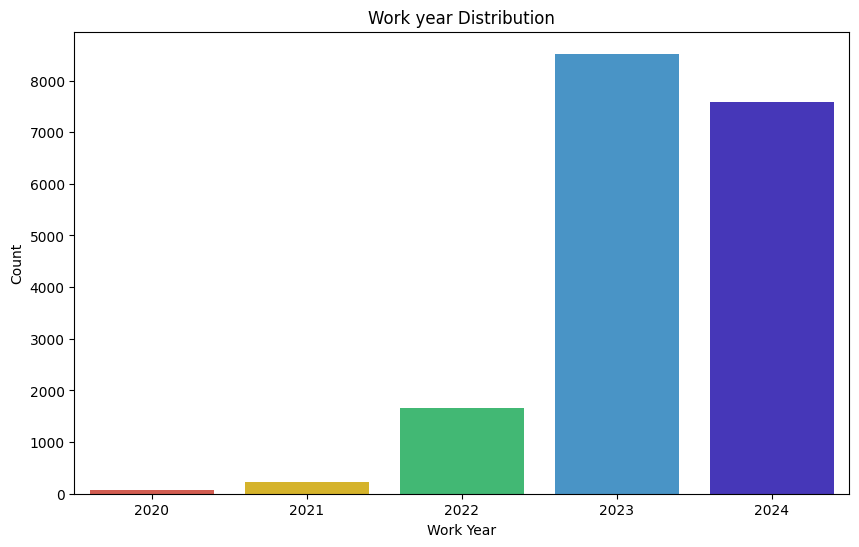

In [183]:
custom_palette = ['#e74c3c','#f1c40f', '#2ecc71', '#3498db', '#3521cd']

plt.figure(figsize=(10,6))
sns.countplot(x='work_year', data = SLR, palette=custom_palette)
plt.title('Work year Distribution')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Experience level</p>

In [184]:
#SLR.drop('Unnamed: 0', axis = 1)

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\2213909629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data = SLR, palette=custom_palette)


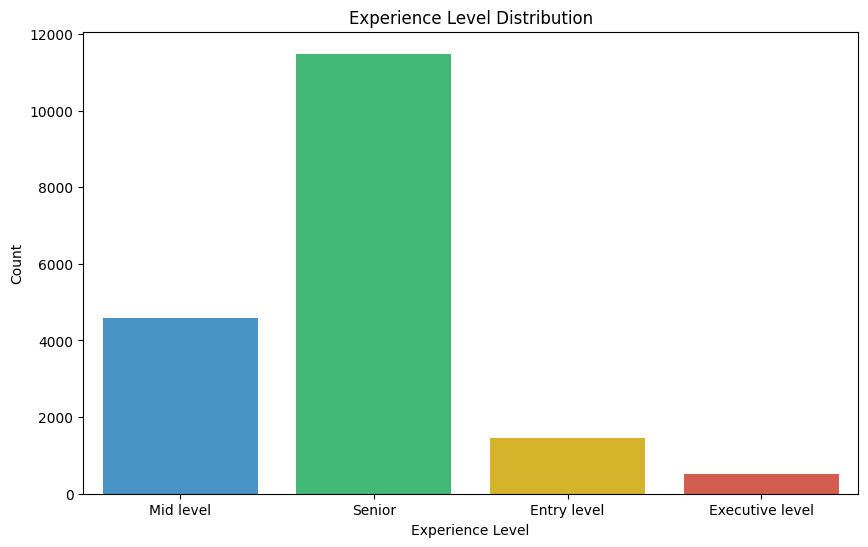

In [185]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f','#e74c3c']

plt.figure(figsize=(10,6))
sns.countplot(x='experience_level', data = SLR, palette=custom_palette)
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Employment_type</p>

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\327255447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_type', data = SLR, palette=custom_palette)


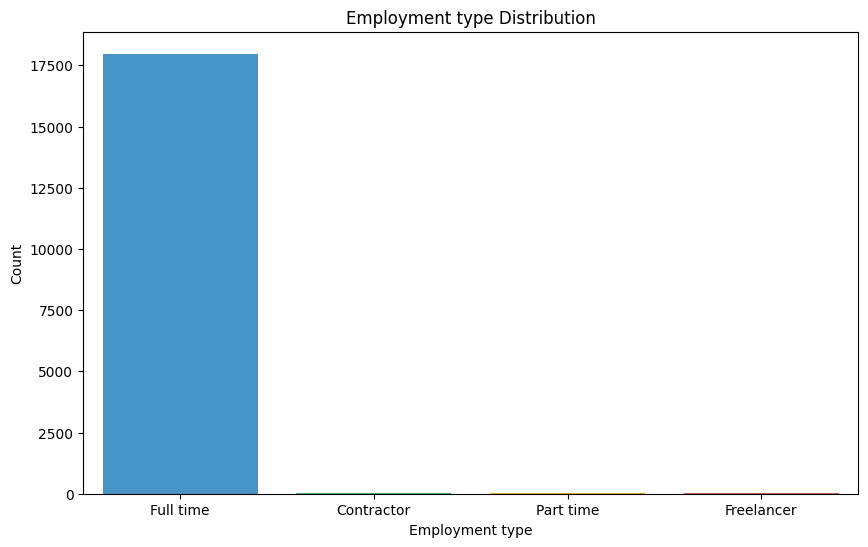

In [186]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f','#e74c3c']

plt.figure(figsize=(10,6))
sns.countplot(x='employment_type', data = SLR, palette=custom_palette)
plt.title("Employment type Distribution")
plt.xlabel("Employment type")
plt.ylabel("Count")
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Job title (category)</p>

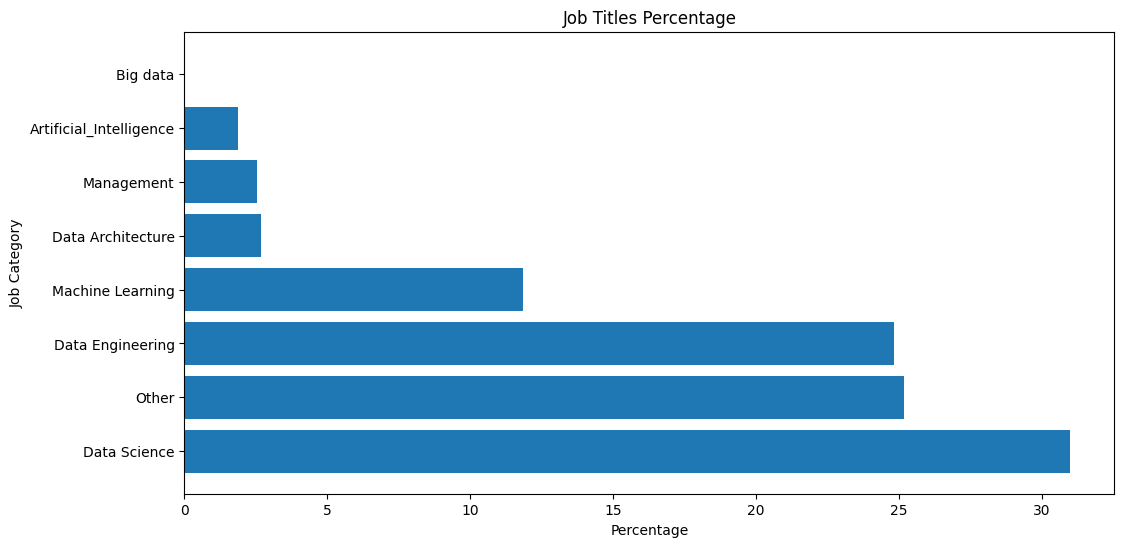

In [187]:
value_counts = SLR['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Remote ratio</p>

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\2303679498.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remote_ratio', data = SLR, palette=custom_palette)


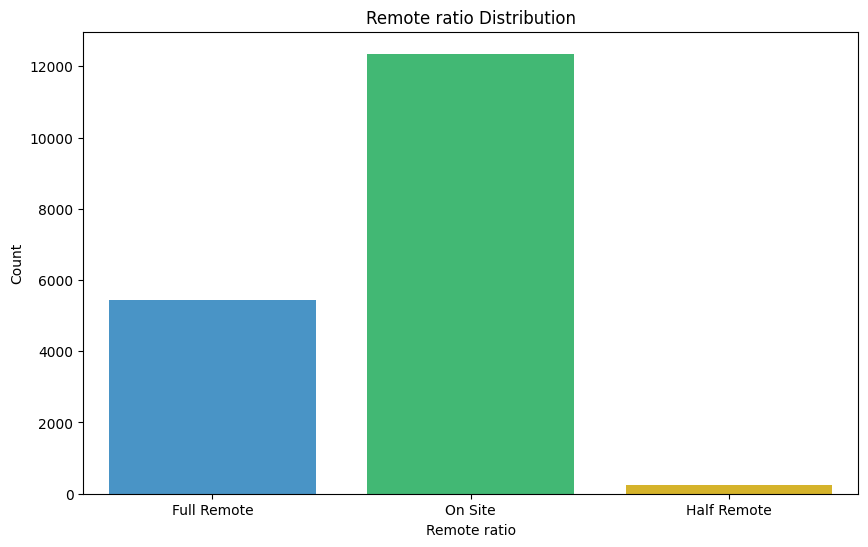

In [188]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f']

plt.figure(figsize=(10,6))
sns.countplot(x='remote_ratio', data = SLR, palette=custom_palette)
plt.title("Remote ratio Distribution")
plt.xlabel("Remote ratio")
plt.ylabel("Count")
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Company size</p>

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\487702812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='company_size', data = SLR, palette=custom_palette)


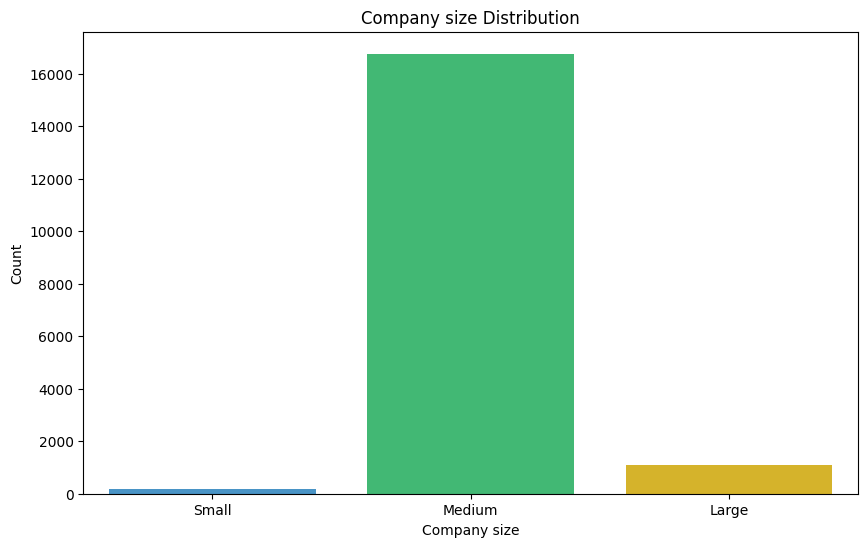

In [189]:
custom_palette = ['#3498db', '#2ecc71', '#f1c40f']

plt.figure(figsize=(10,6))
sns.countplot(x='company_size', data = SLR, palette=custom_palette)
plt.title("Company size Distribution")
plt.xlabel("Company size")
plt.ylabel("Count")
plt.show()

### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Phân tích hai biến</p>


Ở phần này chúng ta lựa ra 2 biến giải thích và biến phản hồi:

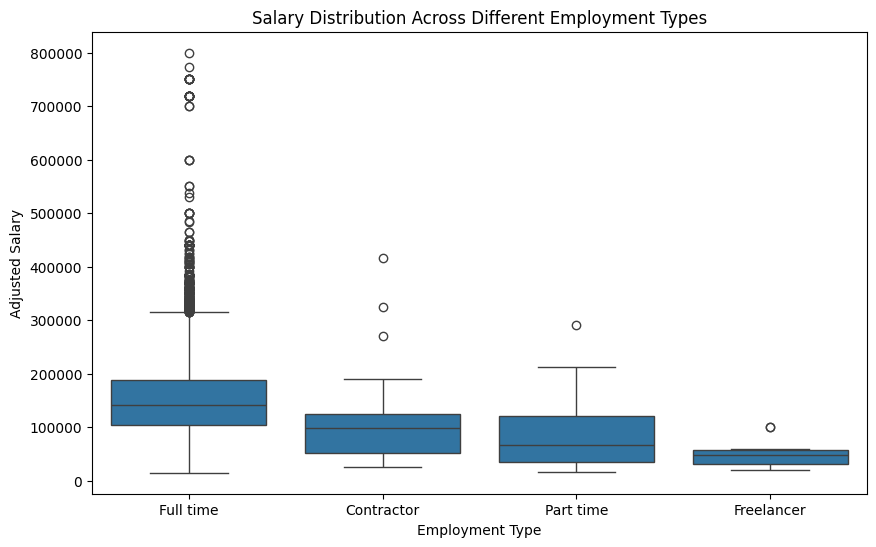

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

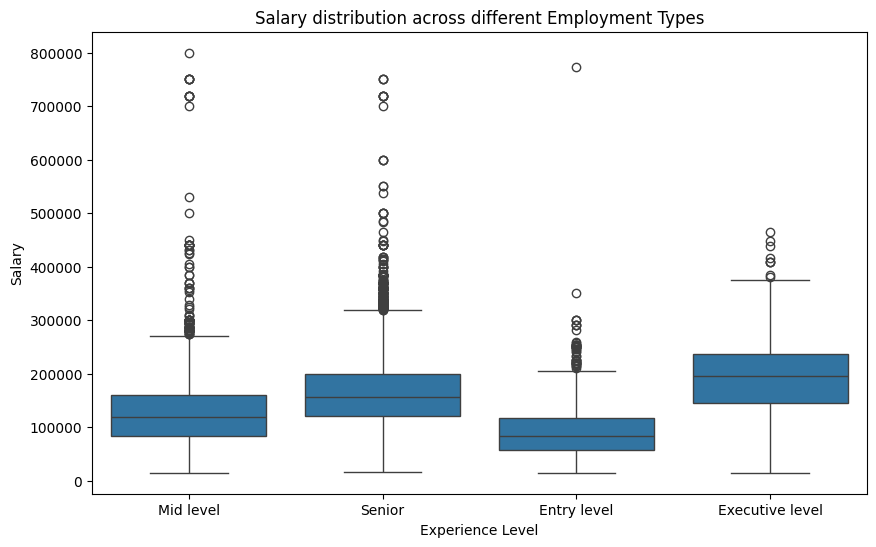

In [191]:
plt.figure(figsize=(10,6))
sns.boxplot(data = SLR, x='experience_level', y='salary_in_usd')
plt.title('Salary distribution across different Employment Types')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

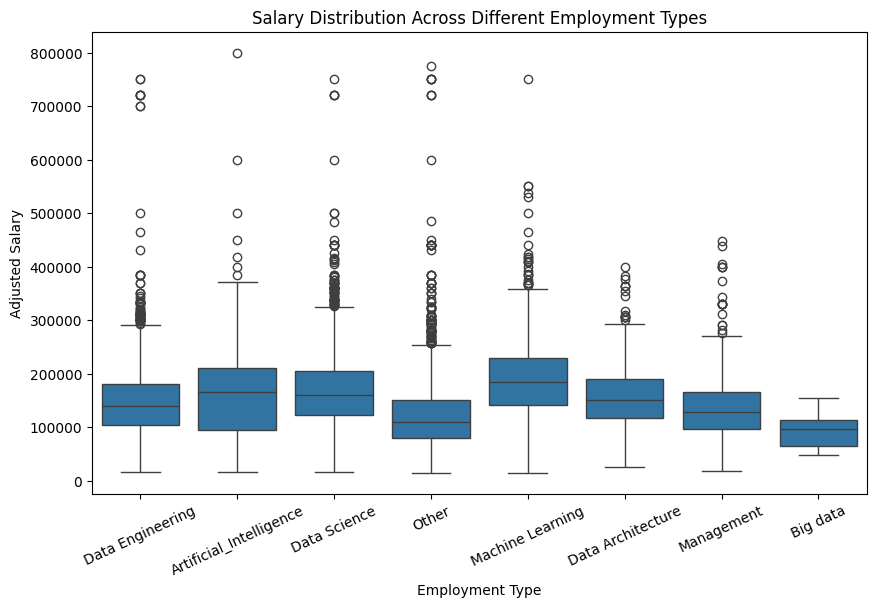

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.xticks(rotation=25)
plt.show()

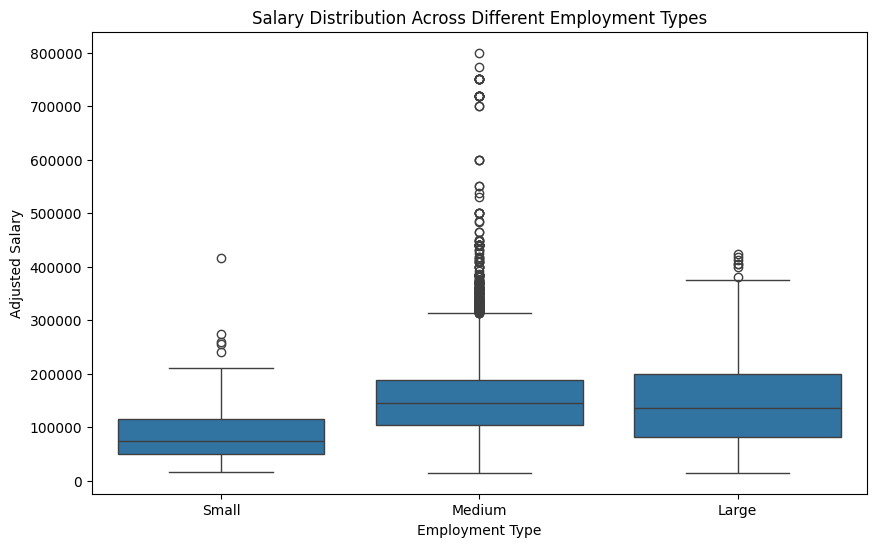

In [193]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

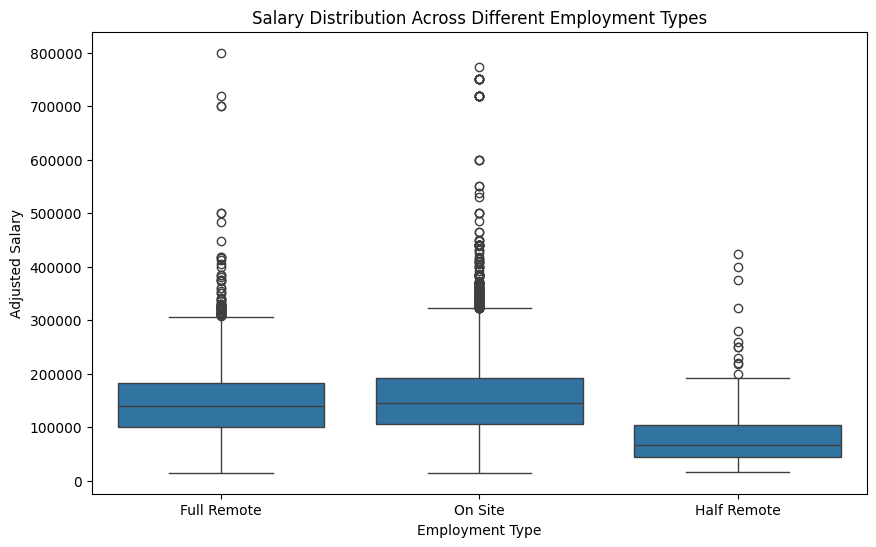

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='remote_ratio', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Phân tích đa biến</p>

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Build Model</p>

Giải thích sơ lược về biến giải thích và biến phản hồi:
 - Biến giải thích là : Dễ hiễu hơn là biến độc lập là biến mà ta có thể cho rằng nó ảnh hưởng đến sự thay đổi trong biến phản hồi.
 - Biến phản hồi là : Đây còn được gọi là biến phụ thuộc vì nó là một biến mà chúng ta đang dự đoán nó. Đây là biến ảnh hưởng bởi các biến giải thích.
 Ví dụ cụ thể như sau: Chỉ số cân nặng sẽ bị ảnh hưởng bởi lượng calo input và output, tiêu thụ calo,...

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">ANOVA</p>

Ở phần kiểm định phương sai ANOVA này ta bắt đầu thực hiện với 2 biến đó là: 
 - Employment_type : là loại hình thức làm việc với tổng có 4 hình thức làm việc đó là
    > Freelance: Hình thức làm việc tự do không gò bó thời gian làm việc
    > Full time: Thường làm việc theo khung giờ được đặt ra ví dụ như thời gian làm việc bắt đầu từ 8:00 sáng và kết thúc và 17:00 chiều
    > Part time: Khung giờ làm việc thường được xếp theo khung nửa ngày ví dụ như thời gian làm việc bắt đầu từ 8:00 sáng và kết thúc và 12:00 trưa
    > Contractor: Như được thuê để làm việc trong 1 dự án và trong khung làm việc nhất định theo trong hợp đồng ví dụ như Programmer được thuê theo hợp đồng 6 tháng để phát triển một phần mềm
 - Salary_in_usd : là loại tiền lương được trả theo năm tính theo đơn vị tiền tệ là USD

* Biến giải thích ở đây là emnployment_Type.
* Biến phản hồi là salary_in_usd.

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     25.51
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.85e-16
Time:                        16:12:18   Log-Likelihood:            -2.2669e+05
No. Observations:               18056   AIC:                         4.534e+05
Df Residuals:                   18052   BIC:                         4.534e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\3255909474.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SLR, x='employment_type', y='salary_in_usd', palette=custom_palette)


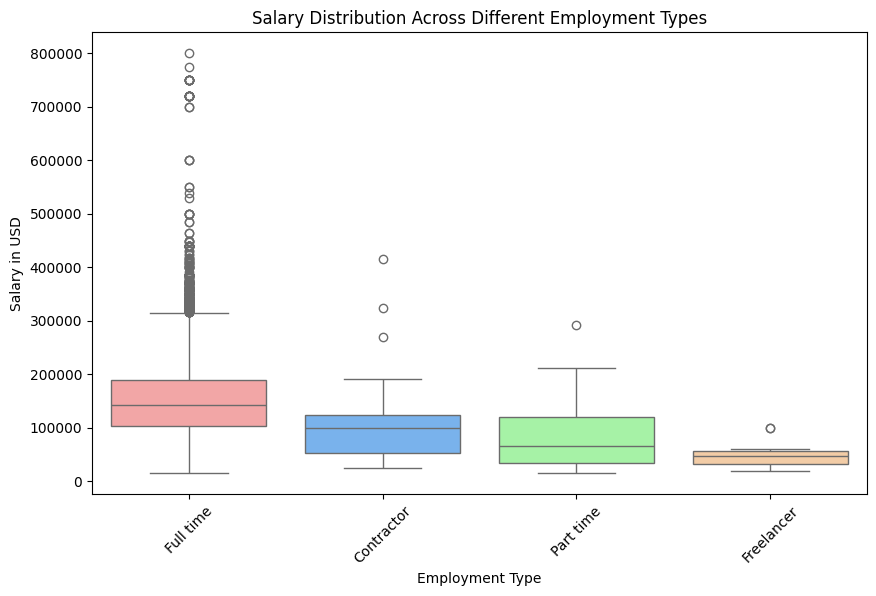

In [195]:
model2 = smf.ols(formula='salary_in_usd ~ C(employment_type)', data=SLR)
results2 = model2.fit()
print(results2.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='employment_type', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

Biến giải thích: Comnpany_size là biến nói về quy mô công ty bao gồm có 3 quy mô chính:
* Large(L): Quy mô công ty lớn.
* Medium(M): Quy mô công ty ở tầm trung bình khá.
* Small(S): Quy mô công ty nhỏ.

Biến phản hồi: Salary_in_usd là tiền lương được trả theo năm tính theo đơn vị USD.

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     96.15
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.92e-42
Time:                        16:12:18   Log-Likelihood:            -2.2663e+05
No. Observations:               18056   AIC:                         4.533e+05
Df Residuals:                   18053   BIC:                         4.533e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\3023843221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SLR, x='company_size', y='salary_in_usd', palette=custom_palette)
C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\3023843221.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(data=SLR, x='company_size', y='salary_in_usd', palette=custom_palette)


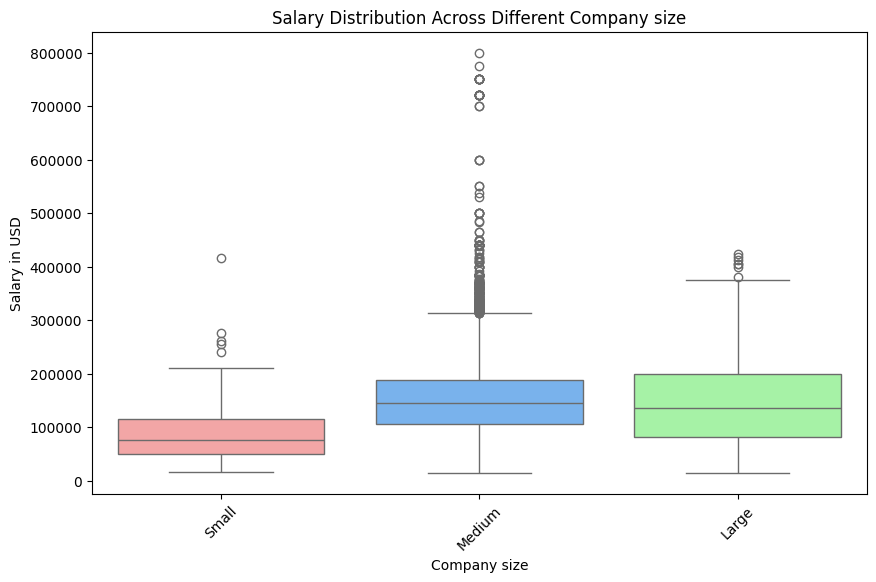

In [196]:
model1 = smf.ols(formula='salary_in_usd ~ C(company_size)', data=SLR)
results1 = model1.fit()
print(results1.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='company_size', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Company size')
plt.xlabel('Company size')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


work year(phân loại) và salary in usd (phản hồi)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     70.11
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           5.14e-59
Time:                        16:12:18   Log-Likelihood:            -2.2659e+05
No. Observations:               18056   AIC:                         4.532e+05
Df Residuals:                   18051   BIC:                         4.532e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.023e+05 

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\2270293898.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SLR, x='work_year', y='salary_in_usd', palette=custom_palette)
C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\2270293898.py:8: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=SLR, x='work_year', y='salary_in_usd', palette=custom_palette)


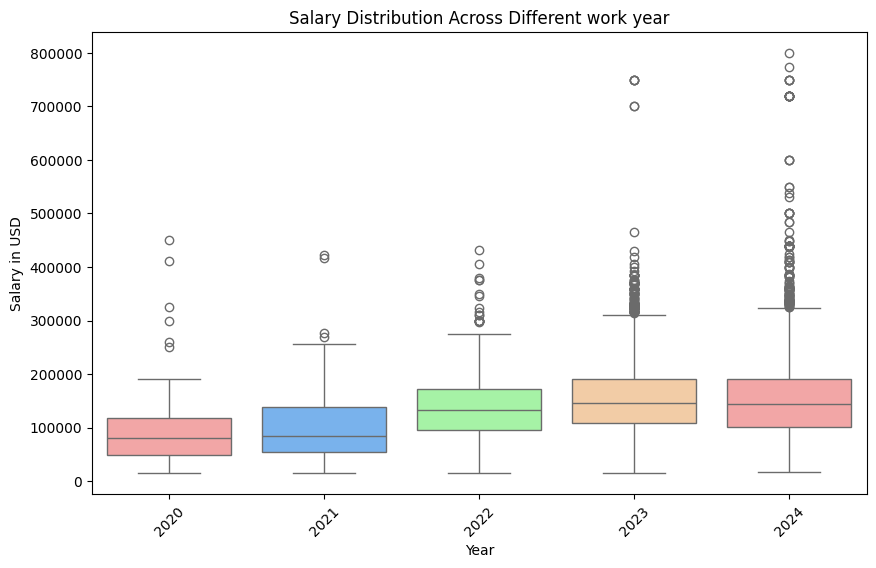

In [197]:
model3 = smf.ols(formula='salary_in_usd ~ C(work_year)', data=SLR)
results3 = model3.fit()
print(results3.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='work_year', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different work year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

experience_level(giải thích) và salary in usd(phản hồi)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     841.1
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:12:18   Log-Likelihood:            -2.2555e+05
No. Observations:               18056   AIC:                         4.511e+05
Df Residuals:                   18052   BIC:                         4.511e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\96883103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SLR, x='experience_level', y='salary_in_usd', palette=custom_palette)


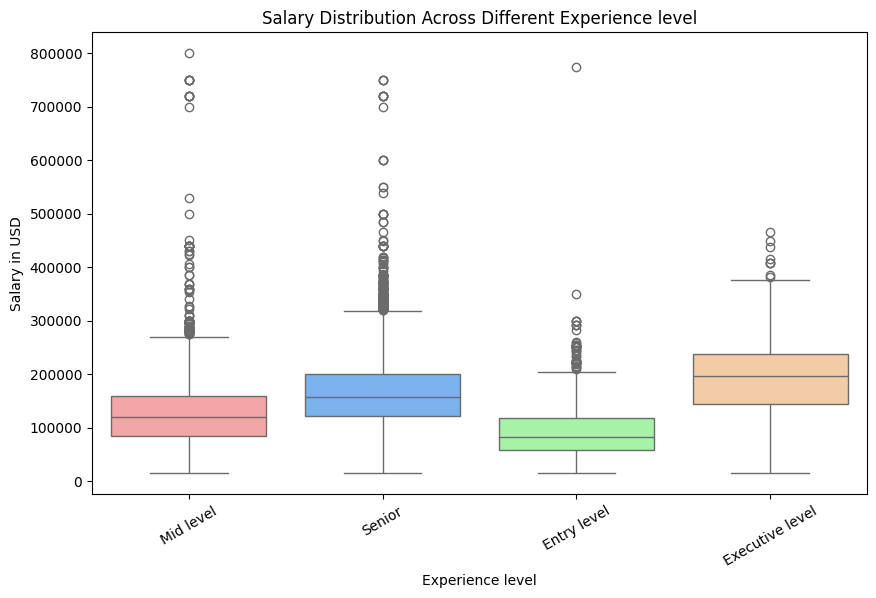

In [198]:
model4 = smf.ols(formula='salary_in_usd ~ C(experience_level)', data=SLR)
results4 = model4.fit()
print(results4.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='experience_level', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Experience level')
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.xticks(rotation=30)
plt.show()

job_category(giải thích) và salary in usd(phản hồi)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     275.3
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:12:18   Log-Likelihood:            -2.2581e+05
No. Observations:               18056   AIC:                         4.516e+05
Df Residuals:                   18048   BIC:                         4.517e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\3378074009.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SLR, x='job_category', y='salary_in_usd', palette=custom_palette)
C:\Users\PC (newgear)\AppData\Local\Temp\ipykernel_6884\3378074009.py:8: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=SLR, x='job_category', y='salary_in_usd', palette=custom_palette)


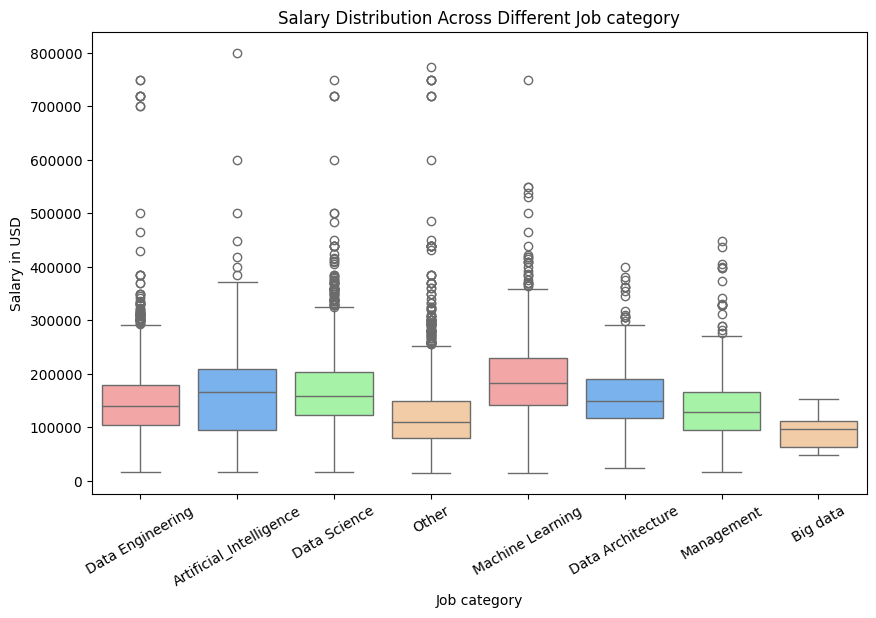

In [199]:
model5 = smf.ols(formula='salary_in_usd ~ C(job_category)', data=SLR)
results5 = model5.fit()
print(results5.summary())

custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(10, 6))
sns.boxplot(data=SLR, x='job_category', y='salary_in_usd', palette=custom_palette)
plt.title('Salary Distribution Across Different Job category')
plt.xlabel('Job category')
plt.ylabel('Salary in USD')
plt.xticks(rotation=30)
plt.show()

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Kiểm định giả thuyết bằng Chi-square</p>

##### Company size và Experience level:
* Biến giải thích là Company size
* Biến phản hồi là Experience level

Kiểm định giả thuyết
* Giả thuyết null (H0): Quy mô công ty không ảnh hưởng đến cấp bậc kinh nghiệm. Nói cách khác, cấp bậc kinh nghiệm của nhân viên không phụ thuộc vào quy mô công ty.Dễ hiểu hơn là 2 biến hoạt động 1 cách độc lập
* Giả thuyết thay thế (Ha): Quy mô công ty có ảnh hưởng đến cấp bậc kinh nghiệm. Để mà dễ hiểu hơn là có mối liên hệ giữa cấp bậc kinh nghiệm của nhân viên và quy mô công ty.

In [200]:
SLR_new_table = SLR[SLR['company_size'].isin(['Medium', 'Large', 'Small'])][['company_size', 'experience_level']]

In [201]:
df_table1= pd.crosstab(SLR_new_table['company_size'], SLR_new_table['experience_level'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table1)
expected_df = pd.DataFrame(expected, index=df_table1.index, columns=df_table1.columns)
print("Bảng tần số chéo: ", df_table1)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)
print("Giá trị kỳ vọng:")
print(expected_df)

Bảng tần số chéo:  experience_level  Entry level  Executive level  Mid level  Senior    All
company_size                                                            
Large                     134               23        354     583   1094
Medium                   1277              492       4159   10839  16767
Small                      52                8         71      64    195
All                      1463              523       4584   11486  18056
Chi square value :  197.1996902076243
p-value 1.233644358318255e-35
Degress of freedom  12
Expected frequencies: 
 [[8.86421134e+01 3.16881923e+01 2.77741249e+02 6.95928445e+02
  1.09400000e+03]
 [1.35855788e+03 4.85663547e+02 4.25675277e+03 1.06660258e+04
  1.67670000e+04]
 [1.58000111e+01 5.64826097e+00 4.95059814e+01 1.24045747e+02
  1.95000000e+02]
 [1.46300000e+03 5.23000000e+02 4.58400000e+03 1.14860000e+04
  1.80560000e+04]]
Giá trị kỳ vọng:
experience_level  Entry level  Executive level    Mid level        Senior  \
company_size 

##### Experience level và job_Category:
* Biến giải thích là Experience level
* Biến phản hồi là job_Category

Kiểm định giả thuyết
* Giả thuyết null (H0): Cấp bậc kinh nghiệm không có ảnh hưởng đến loại công việc. Dễ hiểu hơn thì 2 biến này hoạt động độc lập với nhau.
* Giả thuyết thay thế (Ha): Cấp bậc kinh nghiệm có ảnh hưởng đến loại công việc mà họ chọn. Để mà dễ hiểu hơn là có mối liên hệ giữa cấp bậc kinh nghiệm của nhân viên và loại công việc.

In [202]:
SLR_new_table1 = SLR[SLR['experience_level'].isin(['Senior', 'Mid level', 'Entry level','Executive level'])][['job_category', 'experience_level']]

In [203]:
df_table2= pd.crosstab(SLR_new_table1['experience_level'], SLR_new_table1['job_category'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table2)
print("Bảng tần số chéo: ", df_table2)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)

Bảng tần số chéo:  job_category      Artificial_Intelligence  Big data  Data Architecture  \
experience_level                                                         
Entry level                            32         1                  2   
Executive level                        12         0                  4   
Mid level                              91         2                 26   
Senior                                202         3                454   
All                                   337         6                486   

job_category      Data Engineering  Data Science  Machine Learning  \
experience_level                                                     
Entry level                    198           269                76   
Executive level                177           165                25   
Mid level                     1237          1473               362   
Senior                        2870          3690              1678   
All                           4482        

In [204]:
expected_df2 = pd.DataFrame(expected, index=df_table2.index, columns=df_table2.columns)
print("Giá trị kỳ vọng:")
print(expected_df2)

Giá trị kỳ vọng:
job_category      Artificial_Intelligence  Big data  Data Architecture  \
experience_level                                                         
Entry level                     27.305660  0.486154          39.378489   
Executive level                  9.761354  0.173793          14.077204   
Mid level                       85.556491  1.523261         123.384138   
Senior                         214.376495  3.816792         309.160168   
All                            337.000000  6.000000         486.000000   

job_category      Data Engineering  Data Science  Machine Learning  \
experience_level                                                     
Entry level             363.157178    453.500831        173.476019   
Executive level         129.823106    162.119572         62.015009   
Mid level              1137.875942   1420.948604        543.550288   
Senior                 2851.143775   3560.430992       1361.958684   
All                    4482.000000   5597.00

##### Experience level và employment_type:
* Biến giải thích là experience_level
* Biến phản hồi là employment_type

Kiểm định giả thuyết
* Giả thuyết null (H0): Cấp bậc kinh nghiệm của nhân viên không ảnh hưởng đến loại hình làm việc mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động độc lập nhau.
* Giả thuyết thay thế (Ha): Cấp bậc kinh nghiệm của nhân viên ảnh hưởng sâu sắc đến loại hình làm việc mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động có qua có lại với nhau.

In [205]:
SLR_new_table2 = SLR[SLR['experience_level'].isin(['Senior', 'Mid level', 'Entry level','Executive level'])][['employment_type', 'experience_level']]
SLR_new_table2

,employment_type,experience_level
0,Full time,Mid level
1,Full time,Senior
2,Full time,Senior
3,Full time,Mid level
4,Full time,Mid level
...,...,...
18051,Full time,Senior
18052,Full time,Mid level
18053,Full time,Entry level
18054,Contractor,Entry level


In [206]:
df_table3= pd.crosstab(SLR_new_table2['experience_level'], SLR_new_table2['employment_type'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table3)
print("Bảng tần số chéo: ", df_table3)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)

Bảng tần số chéo:  employment_type   Contractor  Freelancer  Full time  Part time    All
experience_level                                                     
Entry level                7           3       1425         28   1463
Executive level            1           0        522          0    523
Mid level                 14           6       4557          7   4584
Senior                     8           5      11470          3  11486
All                       30          14      17974         38  18056
Chi square value :  250.14965951914704
p-value 4.822241026431058e-44
Degress of freedom  16
Expected frequencies: 
 [[2.43077093e+00 1.13435977e+00 1.45635589e+03 3.07897652e+00
  1.46300000e+03]
 [8.68963226e-01 4.05516172e-01 5.20624834e+02 1.10068675e+00
  5.23000000e+02]
 [7.61630483e+00 3.55427559e+00 4.56318210e+03 9.64731945e+00
  4.58400000e+03]
 [1.90839610e+01 8.90584847e+00 1.14338372e+04 2.41730173e+01
  1.14860000e+04]
 [3.00000000e+01 1.40000000e+01 1.79740000e+04 3.800000

In [207]:
expected_df3 = pd.DataFrame(expected, index=df_table3.index, columns=df_table3.columns)
print("Giá trị kỳ vọng:")
print(expected_df3)

Giá trị kỳ vọng:
employment_type   Contractor  Freelancer     Full time  Part time      All
experience_level                                                          
Entry level         2.430771    1.134360   1456.355893   3.078977   1463.0
Executive level     0.868963    0.405516    520.624834   1.100687    523.0
Mid level           7.616305    3.554276   4563.182100   9.647319   4584.0
Senior             19.083961    8.905848  11433.837173  24.173017  11486.0
All                30.000000   14.000000  17974.000000  38.000000  18056.0


##### Experience level và remote ratio:
* Biến giải thích là experience_level
* Biến phản hồi là remote ratio

Kiểm định giả thuyết
* Giả thuyết null (H0): Cấp bậc kinh nghiệm của nhân viên không ảnh hưởng đến việc làm từ xa mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động độc lập nhau.
* Giả thuyết thay thế (Ha): Cấp bậc kinh nghiệm của nhân viên ảnh hưởng sâu sắc đến việc làm từ xa mà họ đã chọn. Dễ hiểu hơn là 2 biến này hoạt động có qua có lại với nhau.

In [208]:
SLR_new_table3 = SLR[SLR['experience_level'].isin(['Senior', 'Mid level', 'Entry level','Executive level'])][['remote_ratio', 'experience_level']]
SLR_new_table3

,remote_ratio,experience_level
0,Full Remote,Mid level
1,On Site,Senior
2,On Site,Senior
3,Full Remote,Mid level
4,Full Remote,Mid level
...,...,...
18051,Full Remote,Senior
18052,Full Remote,Mid level
18053,Full Remote,Entry level
18054,Full Remote,Entry level


In [209]:
df_table4= pd.crosstab(SLR_new_table3['experience_level'], SLR_new_table3['remote_ratio'], margins=True)
chi2, p, dof, expected = chi2_contingency(df_table4)
print("Bảng tần số chéo: ", df_table4)
print("Chi square value : ", chi2)
print("p-value", p)
print("Degress of freedom ", dof)
print("Expected frequencies: \n", expected)

Bảng tần số chéo:  remote_ratio      Full Remote  Half Remote  On Site    All
experience_level                                          
Entry level               405           80      978   1463
Executive level           188            9      326    523
Mid level                1193           96     3295   4584
Senior                   3666           64     7756  11486
All                      5452          249    12355  18056
Chi square value :  310.2832433906709
p-value 3.246701620606649e-59
Degress of freedom  12
Expected frequencies: 
 [[4.41752105e+02 2.01753988e+01 1.00107250e+03 1.46300000e+03]
 [1.57919584e+02 7.21239477e+00 3.57868022e+02 5.23000000e+02]
 [1.38413646e+03 6.32153301e+01 3.13664821e+03 4.58400000e+03]
 [3.46819185e+03 1.58396876e+02 7.85941128e+03 1.14860000e+04]
 [5.45200000e+03 2.49000000e+02 1.23550000e+04 1.80560000e+04]]


In [210]:
expected_df4 = pd.DataFrame(expected, index=df_table4.index, columns=df_table4.columns)
print("Giá trị kỳ vọng:")
print(expected_df4)

Giá trị kỳ vọng:
remote_ratio      Full Remote  Half Remote       On Site      All
experience_level                                                 
Entry level        441.752105    20.175399   1001.072497   1463.0
Executive level    157.919584     7.212395    357.868022    523.0
Mid level         1384.136464    63.215330   3136.648206   4584.0
Senior            3468.191848   158.396876   7859.411276  11486.0
All               5452.000000   249.000000  12355.000000  18056.0


#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Logistic Regression</p>

In [215]:
SLR = SLR.drop('Unnamed: 0', axis = 1)

In [216]:
SLR['experience_level'] = SLR['experience_level'].replace({
    'Senior': '0',
    'Entry level': '1',
    'Executive level': '2',
    'Mid level': '3',
})
SLR['employment_type'] = SLR['employment_type'].replace({
    'Freelance': '0',
    'Contractor': '1',
    'Full time' : '2',
    'Part time' : '3'
})
SLR['company_size'] = SLR['company_size'].replace({
    'Small': '0',
    'Medium': '1',
    'Large' : '2',
})
SLR['remote_ratio'] = SLR['remote_ratio'].astype(str)
SLR['remote_ratio'] = SLR['remote_ratio'].replace({
    'On Site': '0',
    'Half Remote': '1',
    'Full Remote' : '2',
})

In [220]:
SLR.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,years_of_experience,job_category,remote_binary,employment_full_time
0,2024,3,2,Analytics Engineer,59615,CA,2,CA,0,3,Data Engineering,0,0
1,2024,0,2,AI Developer,252000,US,0,US,1,8,Artificial_Intelligence,0,0
2,2024,0,2,AI Developer,168000,US,0,US,1,7,Artificial_Intelligence,0,0
3,2024,3,2,Data Scientist,199500,US,2,US,1,2,Data Science,0,0
4,2024,3,2,Data Scientist,86700,US,2,US,1,3,Data Science,0,0
5,2024,0,2,Research Engineer,180000,US,0,US,0,9,Other,0,0
6,2024,0,2,Research Engineer,160000,US,0,US,0,8,Other,0,0
7,2024,0,2,Research Scientist,238600,US,0,US,1,9,Data Science,0,0
8,2024,0,2,Research Scientist,112000,US,0,US,1,8,Data Science,0,0
9,2024,0,2,Data Scientist,304000,US,0,US,1,6,Data Science,0,0


##### Vì đây là một mô hình chỉ có thể dự đoán số nên ta sẽ thực hiện chuyển đổi số lại thành nhị phân
* Và ta sẽ đánh giá hiệu suất của mô hình Logistic Regression dựa trên 2 biến đó là remote_binary(remote_ratio) và employment_full_time(employment_type)

In [218]:
SLR['remote_binary'] = SLR['remote_ratio'].apply(lambda x: 1 if x == 'Full Remote' else 0)
SLR['employment_full_time'] = SLR['employment_type'].apply(lambda x: 1 if x == 'Full time' else 0)
df2 = SLR[['remote_binary', 'employment_full_time']]

In [219]:
model = smf.logit('remote_binary ~ employment_full_time', data=df2).fit()
print(model.summary())

coef_employment_full_time = model.params['employment_full_time']
intercept = model.params['Intercept']

odds_employment_full_time_1 = np.exp(intercept + coef_employment_full_time * 1)
odds_employment_full_time_0 = np.exp(intercept + coef_employment_full_time * 0)

print(f"ODD khi employment_full_time = 1: {odds_employment_full_time_1:.4f}")
print(f"ODD khi employment_full_time = 0: {odds_employment_full_time_0:.4f}")

odds_ratio = odds_employment_full_time_1 / odds_employment_full_time_0
print(f"Tỉ lệ ODD giữa employment_full_time = 1 và employment_full_time = 0: {odds_ratio:.4f}")

         Current function value: 0.000000
         Iterations: 35


c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect

LinAlgError: Singular matrix

#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Linear Regression</p>

In [13]:
data = pd.get_dummies(SLR, columns=[
    'experience_level', 'employment_type', 'job_title',
    'employee_residence', 'remote_ratio', 'company_location',
    'company_size', 'job_category'
], drop_first=True)

In [15]:
data

,work_year,salary_in_usd,years_of_experience,experience_level_Executive level,experience_level_Mid level,experience_level_Senior,employment_type_Freelancer,employment_type_Full time,employment_type_Part time,job_title_AI Developer,...,company_location_ZA,company_size_Medium,company_size_Small,job_category_Big data,job_category_Data Architecture,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
0,2024,59615,3,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
1,2024,252000,8,False,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
2,2024,168000,7,False,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
3,2024,199500,2,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,2024,86700,3,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,412000,8,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
18052,2021,151000,2,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
18053,2020,105000,1,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
18054,2020,100000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_pred = model.predict(X_test)

In [237]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute erroe (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3282508590.6470895
Mean Absolute erroe (MAE): 41288.43520258289
R-squared (R2): 0.3091929487997903


In [238]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                        Feature    Coefficient
191                       employee_residence_IL  298262.938064
21      job_title_Analytics Engineering Manager  261940.689962
89             job_title_Data Science Tech Lead  198827.089863
166                       employee_residence_CN  135291.153527
127            job_title_Marketing Data Analyst  124270.289476
..                                          ...            ...
140     job_title_Quantitative Research Analyst -103278.451608
253                         company_location_CL -105218.126261
256                         company_location_CZ -105677.379601
210                       employee_residence_NG -115670.287594
16   job_title_AI Software Development Engineer -127474.734633

[325 rows x 2 columns]


#### <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Decision Tree</p>

In [34]:
SLR.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'years_of_experience',
       'job_category'],
      dtype='object')

In [7]:
SLR = SLR.drop('Unnamed: 0', axis = 1)

In [68]:
SLR_encoded = pd.get_dummies(SLR, columns=[
    'experience_level', 'employment_type', 'job_title',
    'employee_residence', 'remote_ratio', 'company_location',
    'company_size', 'job_category'
], drop_first=True)


In [63]:
SLR.dtypes

work_year              object
experience_level       object
employment_type        object
job_title              object
salary_in_usd          object
employee_residence     object
remote_ratio           object
company_location       object
company_size           object
years_of_experience    object
job_category           object
dtype: object

In [69]:
for col in SLR_encoded.select_dtypes(include=['bool']).columns:
    SLR_encoded[col] = SLR_encoded[col].astype(int)

In [70]:
SLR_encoded.dtypes

work_year                           object
salary_in_usd                       object
years_of_experience                 object
experience_level_Executive level     int64
experience_level_Mid level           int64
                                     ...  
job_category_Data Engineering        int64
job_category_Data Science            int64
job_category_Machine Learning        int64
job_category_Management              int64
job_category_Other                   int64
Length: 325, dtype: object

In [71]:
print(SLR_encoded.head())


  work_year salary_in_usd years_of_experience  \
0      2024         59615                   3   
1      2024        252000                   8   
2      2024        168000                   7   
3      2024        199500                   2   
4      2024         86700                   3   

   experience_level_Executive level  experience_level_Mid level  \
0                                 0                           1   
1                                 0                           0   
2                                 0                           0   
3                                 0                           1   
4                                 0                           1   

   experience_level_Senior  employment_type_Freelancer  \
0                        0                           0   
1                        1                           0   
2                        1                           0   
3                        0                           0   
4           

In [72]:
SLR_encoded

,work_year,salary_in_usd,years_of_experience,experience_level_Executive level,experience_level_Mid level,experience_level_Senior,employment_type_Freelancer,employment_type_Full time,employment_type_Part time,job_title_AI Developer,...,company_location_ZA,company_size_Medium,company_size_Small,job_category_Big data,job_category_Data Architecture,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
0,2024,59615,3,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2024,252000,8,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,2024,168000,7,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,2024,199500,2,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2024,86700,3,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,412000,8,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18052,2021,151000,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18053,2020,105000,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
18054,2020,100000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
X = SLR_encoded.drop(columns=['years_of_experience'])
y = SLR_encoded['years_of_experience']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Thay đổi max_depth để giới hạn độ sâu của cây
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [79]:
y_pred = model.predict(X_test)

Accuracy: 0.3540974529346622
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
          10       0.00      0.00      0.00        18
          11       0.32      0.80      0.45        30
          12       0.17      0.27      0.21        22
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        24
           2       0.55      0.28      0.38       448
           3       0.53      0.78      0.64       471
           5       0.00      0.00      0.00       438
           6       0.00      0.00      0.00       455
           7       0.00      0.00      0.00       487
           8       0.19      1.00      0.33       440
           9       0.11      0.00      0.00       442

    accuracy                           0.35      3612
   macro avg       0.22      0.32      0.23      3612
weighted avg       0.27      0.35      0.26      3612

Confusion Matrix:
 [[314  

c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC (newgear)\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

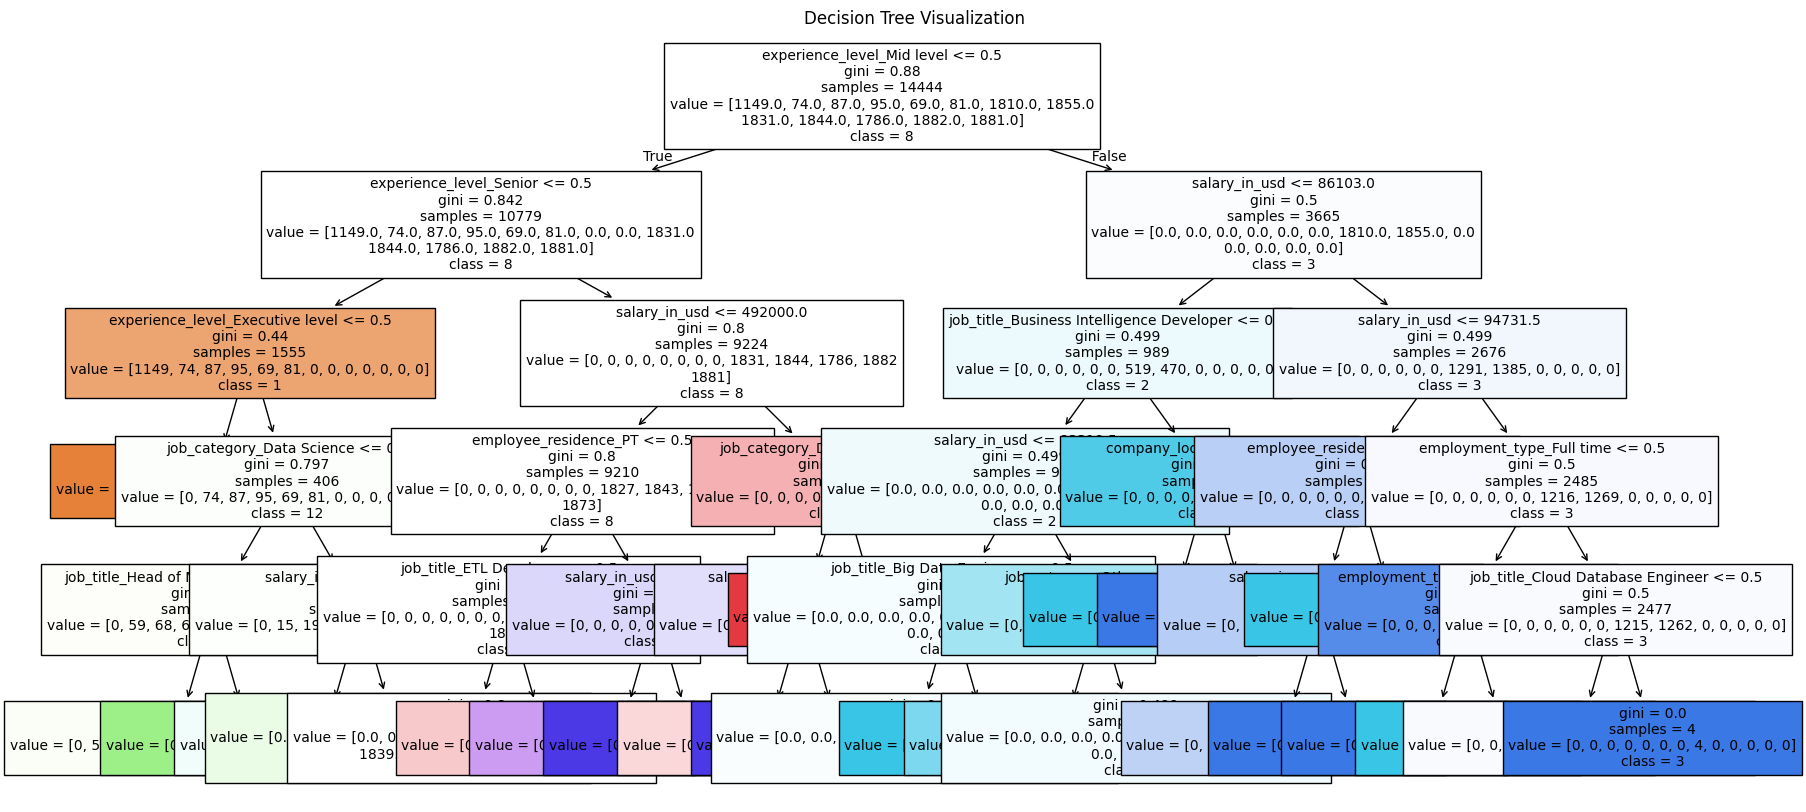

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Hiển thị cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

## <p style="font-size: 36px; font-family: 'Comic Sans MS'; background-color: #f0e68c; color: #228b22; padding: 10px;font-weight: bold;text-align:center">Dự đoán lương theo từng ngành</p>